<a href="https://colab.research.google.com/github/SofiaRguez1020/Topicos_Industria_I/blob/main/TI_1_Practica1_Sofia_Rodriguez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practica 1

**Nombre:** Sofia Daniela Rodriguez Saenz

**e-mail:** sofia.rodriguez5540@alumnos.udg.mx

## MODULES

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import plotly.graph_objects as go

from scipy.stats import wrapcauchy

## CLASSES

In [ ]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y

    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)

    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)

    # rotate vector
    def rotated(self, angle):
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

## Ejemplo Brownian Motion 1D

In [ ]:
#Create a function for reuse
def BrownianMotion(s_pos = 0, n_pos = 1000):
  # Warning about the small number of steps
  if n_steps < 30:
      print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")

  # Init Brownian Walk vector
  bw = np.ones(n_steps)*s_pos

  # Generate trajectory
  for i in range(1, n_steps):
      # Sampling from a uniform distribution
      di = np.random.choice([1,-1])
      # Wiener process
      bw[i] = bw[i-1]+(di/np.sqrt(n_steps))
  return bw

## Actividad 1: Brownian Motion 1D - N Trayectorias (3 pts)

* Implementacion con variable de control que permita generar y graficar cualquier numero de trayectorias
* Visualizar con *matplotlib*

In [ ]:
#Init variables
n_tray = 50 #number of trayectories
s_pos = 0 #initial position
n_steps = 1000
# times aux
times = np.linspace(0,1,n_steps)
#Create nparray to save all trajectories
bw_space = np.zeros(shape=(n_steps,n_tray))
for i in range(n_tray):
  bw_space[:,i] = BrownianMotion(s_pos, n_steps)




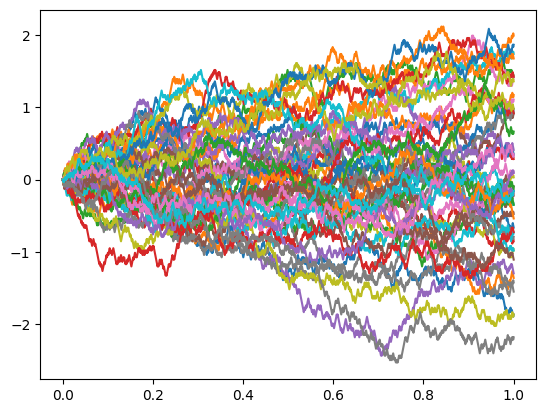

In [ ]:
#Graph trayectories
for i in range(n_tray):
  plt.plot(times, bw_space[:, i])
plt.show()


## Actividad 2: Brownian Motion 2D - 1 Trayectoria (5 pts)

* **No** utilizar la clase Vec2d
* Movimientos: Norte, Sur, Este, Oeste (arriba, abajo, izquierda, derecha)
* Visualizar con **matplotlib** - Proyeccion en 2D
* Visualizar con **matplotlib** - Proyeccion en 3D

**2D Brownian Motion**

In [ ]:
def BrownianMotion2D(speed, y_init, angle):
  cos = math.cos(angle)
  sin = math.sin(angle)
  x = speed*cos - y_init*sin
  y = speed*sin + y_init*sin
  return x, y

In [ ]:
# Init variables
n_steps = 1000
s_pos = 0
speed = 6

#Brownian Walker
BM_2d = np.ones(shape=(n_steps,2))*s_pos

for i in range(1,n_steps):
  angle = np.random.choice([0, np.pi/2, np.pi, 3*np.pi/2])
  velocity = BrownianMotion2D(speed, 0, angle)

  BM_2d[i,0] = BM_2d[i-1,0]+velocity[0]
  BM_2d[i,1] = BM_2d[i-1,1]+velocity[1]



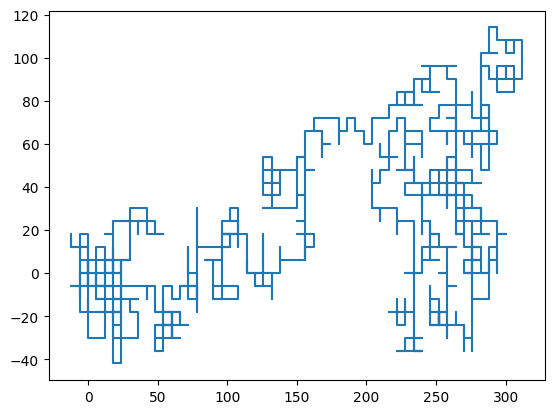

In [ ]:
plt.plot(BM_2d[:,0],BM_2d[:,1])
plt.show()

**3D Brownian Motion**

In [ ]:
time = 5
time_z = np.linspace(0,time,n_steps)

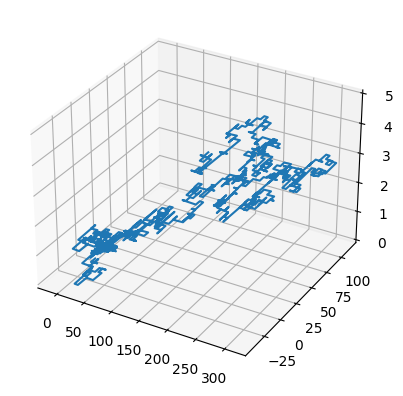

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(BM_2d[:,0],BM_2d[:,1], time_z)
plt.show()

## Actividad 3: Correlated Random Walk - 1 Trayectoria (7 pts)

* Utilizar la clase Vec2d
* Seleccionar los giros del vector de velocidad de una distribucion de Cauchy
* **Tip:** Revisar documentacion de scipy.stats.wrapcauchy
* Visualizar con **plotly** - Proyeccion en 2D
* Visualizar con **plotly** - Proyeccion en 3D

**2D CRW Walk**

In [ ]:
# Init parameters
CRW_exponent = 0.4

n_steps = 10000
s_pos = 0
speed = 6

# Init velocity vector
velocity = Vec2d(speed,0)

#Brownian Walker
BM_2d = np.ones(shape=(n_steps,2))*s_pos

for i in range(1,n_steps):
  # Elegir el angulo de giro
  turn_angle = wrapcauchy.rvs(c=CRW_exponent)
  velocity = velocity.rotated(turn_angle)

  # Update location
  BM_2d[i,0] = BM_2d[i-1,0]+velocity.x
  BM_2d[i,1] = BM_2d[i-1,1]+velocity.y


In [ ]:
fig_2d = go.Figure()

fig_2d.add_trace(go.Scatter(x=BM_2d[:,0],
                            y=BM_2d[:,1],
                            marker=dict(size=2),
                            line=dict(width=2),
                            mode='lines',
                            name='cauchy '+str(CRW_exponent),
                            showlegend=True))

fig_2d.show()

**3D CRW Walk graph**

In [ ]:
#Add time in Z plane
time = 5
time_z = np.linspace(0,time,n_steps)

In [ ]:
fig_3d = go.Figure()

fig_3d.add_trace(go.Scatter3d(x=BM_2d[:,0],
                              y=BM_2d[:,1],
                              z=time_z,
                              marker=dict(size=2),
                              line=dict(width=2),
                              mode='lines',
                              name='cauchy '+str(CRW_exponent),
                              showlegend=True))

fig_3d.update_layout(scene=dict(
                    xaxis_title='x_pos (mm)',
                    yaxis_title='y_pos (mm)',
                    zaxis_title='Time'))

fig_3d.show()